## Train the SVM classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Fetch data and prepare for learning

In [2]:
# The dataset can be provided upon request
df = pd.read_csv("frikk_eirik_dataset.csv")

In [3]:
df.head()

,username,display_name,text_document,user_created_at,bio,location,target
0,00110z,caged,MENTION MENTION yet we do its sad what were do...,2017-09-14 07:04:22,losing fat no matter what gw lighter than yest...,NaN,pro_ed
1,0Riles,rilès EMOJIHourglassWithFlowingSand,you want to go but dont want to stay you want ...,2014-03-24 22:21:03,hypsibius dujardini URL mgmtbookingMENTION ...,NaN,unrelated
2,0_pluto_0,EMOJIGlowingStar nessa EMOJIGlowingStar,MENTION you deserve an amazing sleep and sweet...,2017-09-02 04:21:15,my multifandom ass cant have a specific fandom...,Probably Youtube,unrelated
3,0bessivley_thin,EMOJIRose no one EMOJIRose,rt MENTION i like a girl that can eat no you ...,2017-07-27 00:07:26,sw lbs cw gw gw gw ugw avi is not me,Washington USA,pro_ed
4,0hskinnylove,EMOJIUnfilledHeart,MENTION i think i have to have grapefruit cos ...,2013-08-19 09:28:04,currently self destructing,NaN,pro_ed


unrelated       0.565064
pro_ed          0.336020
pro_recovery    0.098916
Name: target, dtype: float64

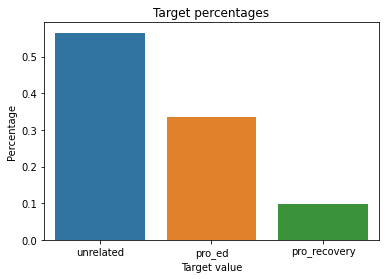

In [4]:
# Check distribution of target variable
target_value_percentage = df["target"].value_counts() / len(df)

# Plot count of values in target-column
sns.barplot(x=target_value_percentage.index, y=target_value_percentage.values)
plt.title("Target percentages")
plt.ylabel("Percentage")
plt.xlabel("Target value")

target_value_percentage

We see that the three classes are highly unbalanced

In [6]:
# For this experiment, only the text-documents are used as features
X, y = df['text_document'], df["target"]

In [23]:
X[0]

'MENTION MENTION yet we do its sad what were doing to our body despite its continuous work damn rt MENTION resisting food makes me feel strong they dim the blue lightto orange your screen emits and it keeps your melatonin production on track friends  drama so ill just be a coward and stay at home go me rt MENTION i love deleting things tweets emails feelings i found those raw vegan coconut bites and theyre amazing even though theyre kinda expensive there are no nutrient value chart on the she doesnt know my calorie intake if she did shed give me so much shit rt MENTION stop reconnecting with toxic people from your past because youre lonely focus on getting better and attracting better MENTION best of luck to you on that meeting  EMOJIFourLeafClover  MENTION in the past id thought im wasting the food when im throwing it away and its true but if we dont it  URL rt MENTION i cant wait to post my before and after pictures but first i have to get after picture ready rt MENTION me in the fut

In [20]:
# Create vectors based on unigrams and TF-IDF score
# Use built-in English stopwords
unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=1200)
unigram_x = unigram_vectorizer.fit_transform(X)

In [21]:
# Display top-20 tf-idf words
feature_array = unigram_vectorizer.get_feature_names()
tfidf_sorting = unigram_vectorizer.idf_

tuples = list(zip(feature_array, tfidf_sorting))
sorted_unigrams = sorted(tuples, key=lambda x: x[1], reverse=True)
print(dict(sorted_unigrams[:20]).keys())

dict_keys(['approvesudol', 'wedoact', 'bodyimage', 'skinny4xmas', 'edrecovery', 'brexit', 'gop', 'tix', 'mentalhealth', 'bonespo', 'eatingdisorders', 'emojisignofthehorns', 'emojirofl', 'leadership', 'emojiunfilledheart', 'eatingdisorder', 'emojidancer', 'giveaway', 'recipe', 'comedy'])


In [30]:
# Split the data into train and test set, based on a 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(unigram_x.toarray(), y, train_size=0.8, random_state=42, stratify=df['target'])

In [31]:
# Change each label into numerical class labels for both train and test labels
labels_dict = {'unrelated': 0, 'pro_ed': 1, 'pro_recovery': 2}

y_train = y_train.values.tolist()
for i in range(len(y_train)):
    y_train[i] = labels_dict[y_train[i]]
    
y_test = y_test.values.tolist()
for i in range(len(y_test)):
    y_test[i] = labels_dict[y_test[i]]

In [32]:
# Import the SVM classifier
clf_svm = svm.LinearSVC()

In [33]:
# Fit the classifier on the training data
clf_svm.fit(X_train, y_train)

LinearSVC()

In [34]:
# Predict on test set
preds_unigram = clf_svm.predict(X_test)

In [35]:
# Show metrics for the classification
c_report = classification_report(y_test, preds_unigram, digits=3)
print(c_report)

              precision    recall  f1-score   support

           0      0.968     0.991     0.979       771
           1      0.989     0.991     0.990       459
           2      0.966     0.830     0.892       135

    accuracy                          0.975      1365
   macro avg      0.974     0.937     0.954      1365
weighted avg      0.975     0.975     0.974      1365



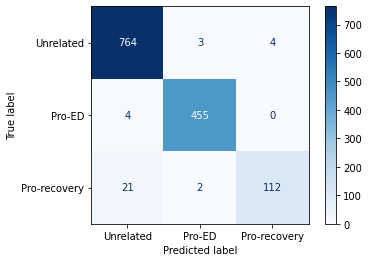

In [36]:
# Show confusion matrix for SVM classifier
conf_mat = confusion_matrix(y_test, preds_unigram)
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['Unrelated','Pro-ED', 'Pro-recovery'])
cmd.plot(cmap='Blues')